In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
# TODO: Change ordered_at to datetime
df["ordered_at"] = pd.to_datetime(df["ordered_at"])

In [6]:
# TODO: Change price and line_total to float
for column in ['price', 'line_total']:
    df[column] = df[column].apply(lambda x: pd.to_numeric(x[1:]))

In [7]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [8]:
df[df.duplicated()].shape[0]

538

In [9]:
# TODO: use drop_duplicates() here
df.drop_duplicates()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5


In [10]:
df.isnull().sum()

order_id         0
name          1488
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [11]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [12]:
# TODO: use drop.na() here, remember to do it "in place"
df.dropna(inplace = True)

#### Sanity check for value ranges and to check assumptions

In [13]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

29

In [14]:
df[df['line_total'] < 0].shape[0]

282

#### TODO: 
Set line_total = price * quantity if different.

Then remove if line total < 0

In [15]:
# TODO: Set line_total = price * quantity.
df = df[(df['price'] * df['quantity']) == df['line_total']]

In [16]:
# TODO: Then remove if line total < 0
df = df[df['line_total'] >= 0]

In [17]:
df.describe()

,order_id,ordered_at,price,quantity,line_total
count,28123.000000,28123,28123.000000,28123.000000,28123.000000
mean,14991.608185,2018-04-15 10:36:01.665825280,2.510187,2.001849,5.028126
min,10000.000000,2018-01-01 11:30:00,0.500000,1.000000,0.500000
25%,12499.000000,2018-02-23 03:10:24,1.500000,1.000000,2.500000
50%,14966.000000,2018-04-14 12:09:22,2.500000,2.000000,4.500000
75%,17504.500000,2018-06-06 23:10:05,3.500000,3.000000,7.500000
max,19999.000000,2018-07-28 18:51:57,4.000000,3.000000,12.000000
std,2888.720159,NaN,1.059949,0.819537,3.086370


#### TODO: Get value between "" in name and put it in category column

In [18]:
pattern = r'^"([A-Z ]+)" (.*)'
transform_func = lambda x: re.findall(pattern, x)[0]
 
df[['category', 'name']] = df['name'] \
    .apply(transform_func) \
    .apply(pd.Series)

In [19]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

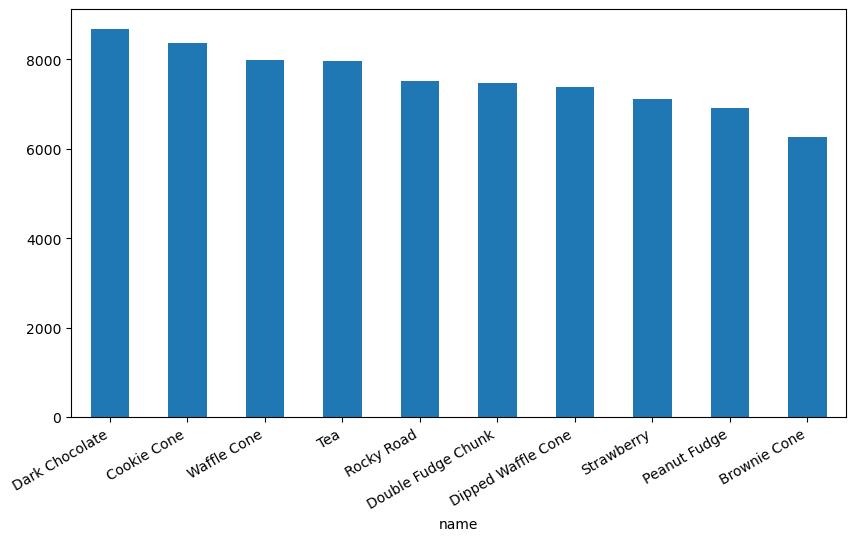

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()